In [1]:
import numpy as np
import matplotlib.pylab as plt
from PIL import Image

#Movimiento en plano inclinado

\begin{equation}
x(t) = -\frac{g}{2\omega^2} \left( \frac{e^{\omega t}-e^{-\omega t}}{2}\right) -\sin\omega t
\end{equation}

Primero, se reeplazan en la ecuación los datos iniciales proporcionados {x(1) = 0.51}. Al hacer esto, es posible expresar la ecuación como una función de ω de la siguiente manera.

In [30]:
def f(x):
  a = (np.exp(x)-np.exp(-x))/2 + np.sin(x)
  return 1.02 + 9.72*a
f = np.vectorize(f)

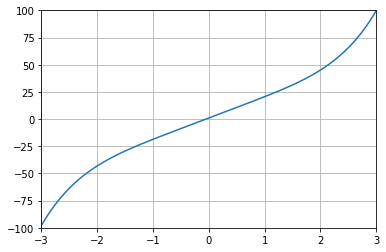

In [31]:
dom = np.linspace(-np.pi,np.pi,100)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ylim(-100,100)
plt.xlim(-3,3)
plt.grid()
ax.plot(dom, f(dom))

In [23]:
from scipy.optimize import bisect

In [34]:
b = bisect(f, a=-1,b=1, xtol=1E-5)
print(f'La velocidad del objeto es {b:.2f} rad/s')

La velocidad del objeto es -0.05 rad/s


#Angulos de falla de rozamiento y colision

In [49]:

D1, D2, l, h, b = 30, 55, 89, 49, np.deg2rad(11.5)

def f2(D, l, h, b):
  A = l*np.sin(b)
  B = l*np.cos(b)
  C = (h + 0.5*D)*np.sin(b) - 0.5*D*np.tan(b)
  E = (h + 0.5*D)*np.cos(b) - 0.5*D
  
  fun = lambda alpha: A*alpha*np.cos(alpha) + B*np.sin(alpha)**2 - C*np.cos(alpha) - E*np.sin(alpha)
  
  return np.rad2deg(bisect(fun, 0, 2, xtol=10E-6))


In [54]:
print(f'El angulo obtenido es aproximandamente {f2(D1, l, h, b):.2f}')

El angulo obtenido es aproximandamente 32.67


#Fractal

In [6]:
Npx_X = 80 #Numero de pixeles en x
Npx_Y = 80 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
#Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin

In [7]:
#Definicion  la funcion y las derivada 
def f(z): 
  return z**3 - 1

def fp(z): 
  return 3*z**2

h = 1E-4
def fpn(z, h): 
  return (f(z+h)-f(z))/h

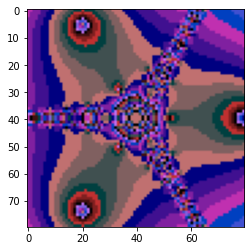

In [8]:
a = 0.2
Niteraciones = 120
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1 
  y = -1
  for zy_ in zy: 
      y = y + 1
      Z_0 = complex(zx_, zy_)
    
      for i in range(0, Niteraciones): 
        Z = Z_0 - a * f(Z_0)/fp(Z_0)

        if( abs(Z-Z_0)<= eps):
          break 
          
        Z_0 = Z
      #print(i)
      #print(i)
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16
      
      image.putpixel((x,y), (r,g,b) )

plt.imshow(image)